In [46]:
import numpy as np
import pandas as pd
import seaborn as sns

applications = pd.read_csv('applications(2.0).csv')
industries = pd.read_csv('industries(2.0).csv')

In [4]:
applications.shape

(13315, 10)

In [5]:
#Прибери дублікати applicant_id
applications = applications.drop_duplicates(subset = 'applicant_id', keep = 'last')
applications.shape

(13278, 10)

In [6]:
#В полі 'External Rating' заповни відсутні значення нулями
applications['External Rating'] = applications['External Rating'].fillna(0)

In [7]:
applications.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13278 entries, 1 to 13314
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Applied at       13278 non-null  object 
 1   Amount           13245 non-null  float64
 2   Age              13278 non-null  int64  
 3   Gender           13278 non-null  object 
 4   Industry         13278 non-null  object 
 5   Marital status   13278 non-null  object 
 6   External Rating  13278 non-null  float64
 7   Education level  13245 non-null  object 
 8   Location         11505 non-null  object 
 9   applicant_id     13278 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.1+ MB


In [9]:
#В полі 'Education level' заповни відсутні значення текстом “Середня”
applications['Education level'] = applications['Education level'].fillna('Середня')

In [10]:
applications.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13278 entries, 1 to 13314
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Applied at       13278 non-null  object 
 1   Amount           13245 non-null  float64
 2   Age              13278 non-null  int64  
 3   Gender           13278 non-null  object 
 4   Industry         13278 non-null  object 
 5   Marital status   13278 non-null  object 
 6   External Rating  13278 non-null  float64
 7   Education level  13278 non-null  object 
 8   Location         11505 non-null  object 
 9   applicant_id     13278 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.1+ MB


In [13]:
#2. Додай до цього DataFrame дані з файлу industries.csv, а саме, рейтинги індустрій.
df = pd.merge(applications, industries, on = 'Industry', how = 'left')
df

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score
0,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20
1,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10
2,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15
3,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15
4,11.30.2022 10:27:38,16500.0,31,Чоловік,E-commerce,Single,8.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f720bf9c5c4c3e10a8568c1699847696,15
...,...,...,...,...,...,...,...,...,...,...,...
13273,01.09.2023 11:01,12000.0,25,Чоловік,Medtech / Healthcare,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Харків чи область,01908b949a6a1eb44d1ee013ec377f9d,15
13274,01.09.2023 11:14,10500.0,28,Чоловік,Blockchain,Married,5.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,6599ba629cfcfe8ac42c7d31c13f62de,0
13275,01.09.2023 11:19,5790.0,25,Чоловік,Blockchain,Married,3.0,"Вища (бакалавр, спеціаліст, магістр)",Дніпро чи область,e57f181bec5b11870a541c43d9b960f7,0
13276,01.09.2023 11:28,13500.0,31,Чоловік,Mobile,Single,8.0,Середня,Одеса чи область,a340c62a1226509949ef60df10a7d726,15


Рейтинг 

In [14]:
df['Rating'] = df.Score

In [15]:
df['Age_Score'] = ((df.Age > 35) & (df.Age < 55)) * 20

In [16]:
df['Rating'] = df.Rating + df.Age_Score

In [23]:
df['Applied at'] = pd.to_datetime(df['Applied at'], format = 'mixed')
df['Weekday'] = df['Applied at'].dt.weekday
df['Weekday_Score'] = ~((df.Weekday ==5) | (df.Weekday ==6))*20

In [25]:
df['Rating'] = df.Rating + df.Weekday_Score
#df.head()

In [26]:
df['Marital status'].unique()

array(['Single', 'Married', 'Other'], dtype=object)

In [27]:
df['Marital_Score'] = (df['Marital status'] == 'Married')*20

In [28]:
df['Rating'] = df.Rating + df.Marital_Score

In [29]:
df['Location_score'] = (df['Location'] == 'Київ чи область')*10

In [30]:
df['Rating'] = df.Rating + df.Location_score

In [32]:
def external_rating_score(x):
    if x >= 7:
        return 20
    elif x <= 2:
        return -20
    else:
        return 0

df['ExRating_score'] = df['External Rating'].apply(external_rating_score)

In [35]:
df['Rating'] = df.Rating + df.ExRating_score
df.head(10)

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Rating,Age_Score,Weekday,Weekday_Score,Marital_Score,Location_score,ExRating_score
0,2022-11-30 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20,80,20,2,20,0,0,0
1,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,60,0,2,20,0,10,0
2,2022-11-30 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15,-5,0,2,20,0,0,-20
3,2022-11-30 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15,55,0,2,20,0,0,0
4,2022-11-30 10:27:38,16500.0,31,Чоловік,E-commerce,Single,8.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f720bf9c5c4c3e10a8568c1699847696,15,125,0,2,20,0,10,20
5,2022-11-30 10:27:42,4200.0,30,Чоловік,Media,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,0aaf59fb3ef90f50ccd4800312e5c271,5,15,0,2,20,20,10,-20
6,2022-11-30 10:27:44,3600.0,24,Чоловік,E-commerce,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,aa54d6e672e4233febadbafdfd048327,15,15,0,2,20,20,0,-20
7,2022-11-30 10:28:00,1950.0,27,Чоловік,Automotive,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,2eed2883cd1673b21b2ce89d1115c245,15,15,0,2,20,20,0,-20
8,2022-11-30 10:28:00,NaN,17,Чоловік,Інша,Married,2.0,Ще студент вишу,NaN,9c7a640dccb37d9f2164bac1deb0edfa,10,10,0,2,20,20,0,-20
9,2022-11-30 10:28:03,18000.0,25,Чоловік,Dating,Single,5.0,"Вища (бакалавр, спеціаліст, магістр)",Дніпро чи область,f8138219d5a95649cc85bdabeb3732ca,5,45,0,2,20,0,0,0


In [38]:
mask_zero = df['Amount'].isna() | (df['External Rating'] == 0)
df.loc[mask_zero, 'Rating'] = 0
df.head(10)

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Rating,Age_Score,Weekday,Weekday_Score,Marital_Score,Location_score,ExRating_score
0,2022-11-30 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20,0,20,2,20,0,0,0
1,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,60,0,2,20,0,10,0
2,2022-11-30 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15,0,0,2,20,0,0,-20
3,2022-11-30 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15,55,0,2,20,0,0,0
4,2022-11-30 10:27:38,16500.0,31,Чоловік,E-commerce,Single,8.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f720bf9c5c4c3e10a8568c1699847696,15,125,0,2,20,0,10,20
5,2022-11-30 10:27:42,4200.0,30,Чоловік,Media,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,0aaf59fb3ef90f50ccd4800312e5c271,5,15,0,2,20,20,10,-20
6,2022-11-30 10:27:44,3600.0,24,Чоловік,E-commerce,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,aa54d6e672e4233febadbafdfd048327,15,15,0,2,20,20,0,-20
7,2022-11-30 10:28:00,1950.0,27,Чоловік,Automotive,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,2eed2883cd1673b21b2ce89d1115c245,15,15,0,2,20,20,0,-20
8,2022-11-30 10:28:00,NaN,17,Чоловік,Інша,Married,2.0,Ще студент вишу,NaN,9c7a640dccb37d9f2164bac1deb0edfa,10,0,0,2,20,20,0,-20
9,2022-11-30 10:28:03,18000.0,25,Чоловік,Dating,Single,5.0,"Вища (бакалавр, спеціаліст, магістр)",Дніпро чи область,f8138219d5a95649cc85bdabeb3732ca,5,45,0,2,20,0,0,0


In [47]:
df_new_index = df[['Applied at', 'Rating']].set_index(['Applied at'])
#df_new_index

In [45]:
df_for_plot = df_new_index.resample('W', label = 'left').mean().reset_index()

<Axes: xlabel='Applied at', ylabel='Rating'>

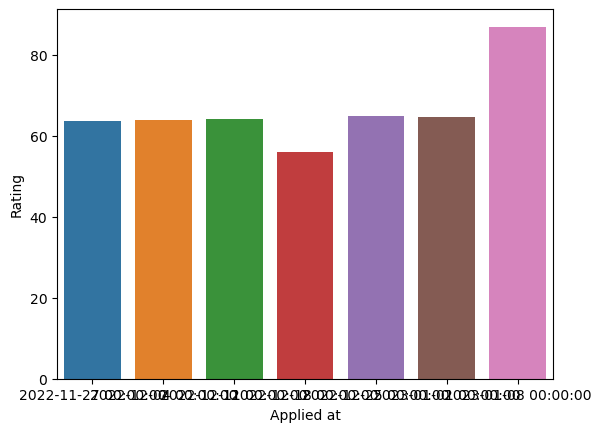

In [54]:
sns.barplot(df_for_plot, x = 'Applied at', y = 'Rating')